In [1]:
import torch
import warnings
warnings.filterwarnings("ignore")
torch.cuda.is_available()

True

In [2]:
import pandas as pd

df = pd.read_json('..\\datasets\\headlines.json', lines=True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [3]:
df = df[['headline', 'short_description', 'category']]
df

,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...,TECH
209523,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr...",SPORTS
209524,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked...",SPORTS
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...,SPORTS


In [4]:
df['headline'] = df['headline'] + df['short_description']

In [5]:
df['headline_len'] = df['headline'].apply(lambda x: len(str(x).split()))
df['headline_len']

0         39
1         40
2         24
3         33
4         35
          ..
209522    25
209523    29
209524    39
209525    27
209526    27
Name: headline_len, Length: 209527, dtype: int64

                mean: 28.36
       harmonic mean: 0.00


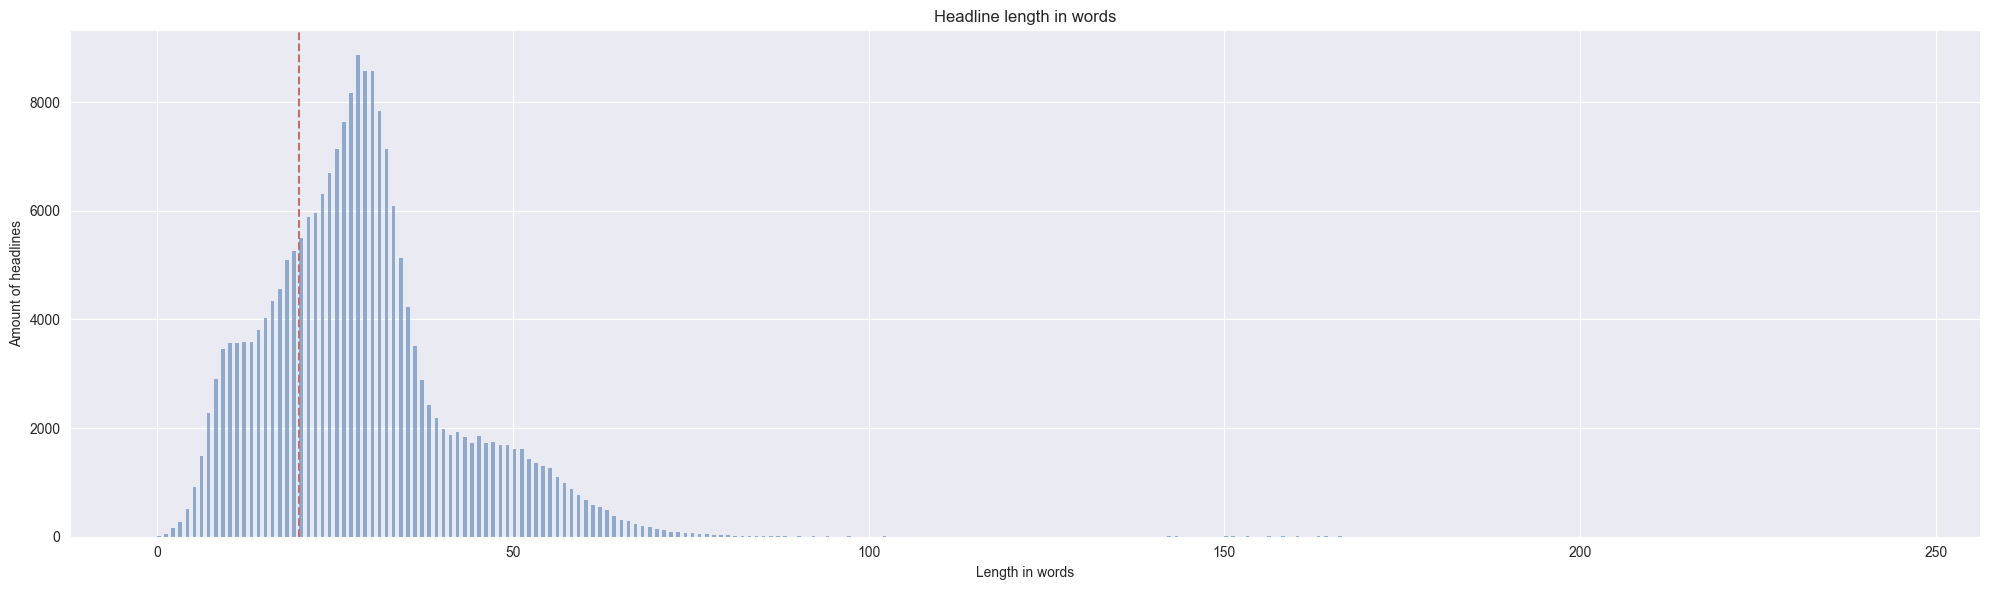

In [6]:
from matplotlib import pyplot as plt
from scipy.stats import hmean
import seaborn as sb

mid_blue = '#6f93bf'
mid_red = '#bf6f6f'

min_headline_len = 0
max_headline_len = 20

headline_mean = df['headline_len'].mean()
harmonic_headline_mean = hmean(df['headline_len'])

print(
    f"{"mean":>20}: {headline_mean:.2f}",
    f"{"harmonic mean":>20}: {harmonic_headline_mean:.2f}", sep='\n'
)

fig, axes = plt.subplots(figsize=(20, 6))

axes.set_title('Headline length in words')
axes.set_xlabel('Length in words')
axes.set_ylabel('Amount of headlines')
sb.histplot(df['headline_len'], ax=axes, binwidth=0.5, linewidth=0, color=mid_blue)
axes.axvline(x=max_headline_len, color=mid_red, linestyle='--', label='cutoff')

plt.tight_layout()

Beautiful gaussian curve.

In [7]:
headline_cut_to = lambda min, max: (df['headline_len'] > min) & (df['headline_len'] <= max)

shorter_than_100 = len(df[headline_cut_to(0, 100)])
longer_than_100 = len(df) - len(df[headline_cut_to(0, 100)])

print(
    "Amount of headlines",
    f"  shorter/equal to 100: {shorter_than_100:_}",
    f"       longer than 100: {longer_than_100:_}", sep='\n'
)

Amount of headlines
  shorter/equal to 100: 209_310
       longer than 100: 217


Since we're going to train our model on most average headline length. <br>
I don't see any point to use such small fraction of data. <br>
It can be very problematic for training our model. So we can safely remove it.

min: 1014
max: 35602


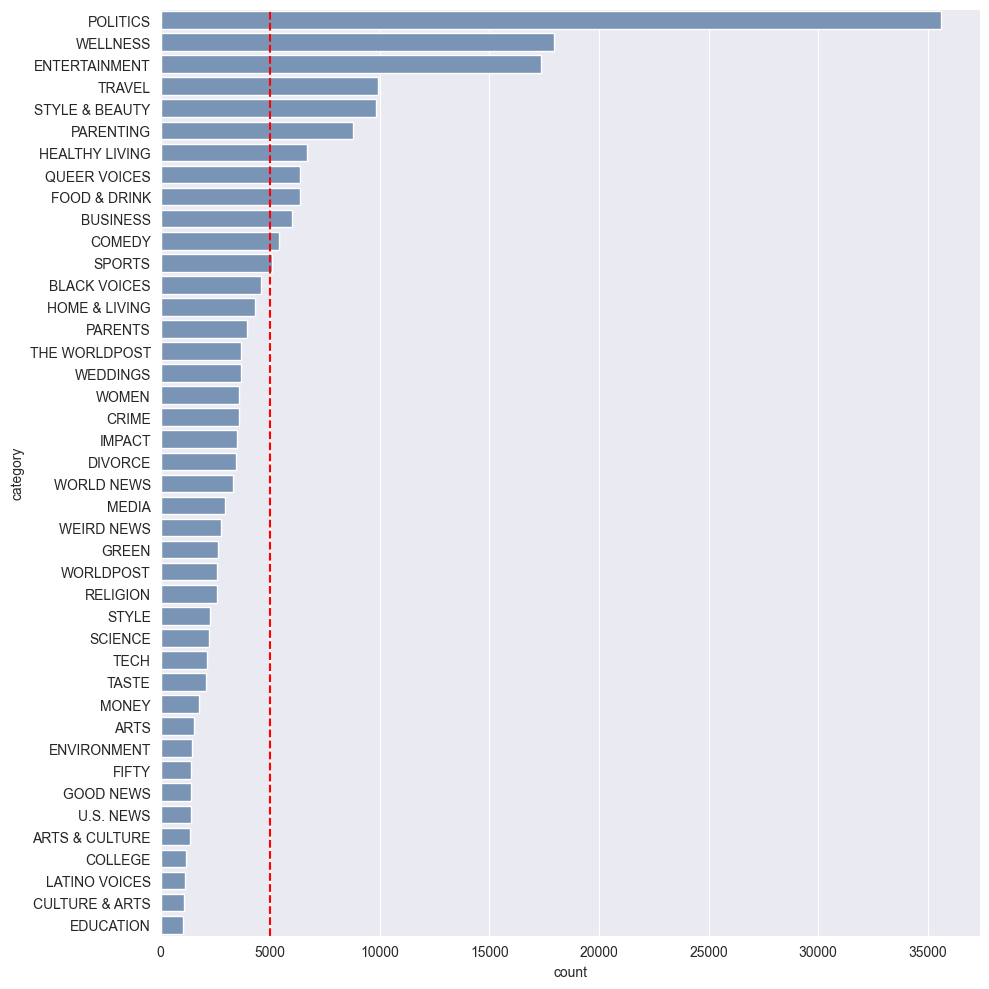

In [8]:
sorted_categories = df['category'].value_counts().index

fig, axes = plt.subplots(figsize=(10, 10))

min_label = df['category'].value_counts().min()
max_label = df['category'].value_counts().max()

print(
    f"min: {min_label}",
    f"max: {max_label}", sep='\n'
)

sb.countplot(df['category'], order=sorted_categories, color=mid_blue)
axes.axvline(x=5_000, color='red', linestyle='--')
plt.tight_layout()

#### Downsampling

In [9]:
from sklearn.utils import resample

target = 5_000

all_groups = []

for label, group in df.groupby('category'):
    if len(group) >= target:
        resampled_group = group.sample(n=target, random_state=42, replace=False)
        all_groups.append(resampled_group)
    else:
        all_groups.append(group)

df = pd.concat(all_groups)

In [10]:
df['category'].value_counts()

category
COMEDY            5000
BUSINESS          5000
SPORTS            5000
STYLE & BEAUTY    5000
PARENTING         5000
QUEER VOICES      5000
POLITICS          5000
HEALTHY LIVING    5000
FOOD & DRINK      5000
ENTERTAINMENT     5000
TRAVEL            5000
WELLNESS          5000
BLACK VOICES      4583
HOME & LIVING     4320
PARENTS           3955
THE WORLDPOST     3664
WEDDINGS          3653
WOMEN             3572
CRIME             3562
IMPACT            3484
DIVORCE           3426
WORLD NEWS        3299
MEDIA             2944
WEIRD NEWS        2777
GREEN             2622
WORLDPOST         2579
RELIGION          2577
STYLE             2254
SCIENCE           2206
TECH              2104
TASTE             2096
MONEY             1756
ARTS              1509
ENVIRONMENT       1444
FIFTY             1401
GOOD NEWS         1398
U.S. NEWS         1377
ARTS & CULTURE    1339
COLLEGE           1144
LATINO VOICES     1130
CULTURE & ARTS    1074
EDUCATION         1014
Name: count, dtype: int64

In [11]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,headline,short_description,category,headline_len
0,Obama Administration Brings Global LGBTI Commu...,The resounding international LGBTI-affirming c...,QUEER VOICES,37
1,Russia Announces War Games After Accusing Ukra...,Moscow has massed troops on Ukraine’s border w...,THE WORLDPOST,21
2,ODC's Electrifying boulders and bonesMuch of h...,"Much of his work is ephemeral, expressly desig...",CULTURE & ARTS,42
3,Officials Prepare For The Worst In Oroville Da...,"Nearly 200,000 people have been evacuated.",GREEN,14
4,"Wedding Trailblazers: Toronto Baker, The Sugar...",We talked with Grafstein-Ho about how she crea...,WEDDINGS,29


#### Tokenizing headlines
1) shuffle dataset so train and test contain exact amount of each category
2) apply tokenizing function

In [12]:
import re

def text_clean(text):
    result = text.lower()
    result = re.sub(r'[^a-zA-Z\s]', '', result)
    result = re.sub(r' +', ' ', result)
    return result

In [13]:
sample = '!@#this is "a   "sample! (T*eXt)...'
print(
    f"Before: {sample}",
    f"After: {text_clean(sample)}", sep='\n'
)

Before: !@#this is "a   "sample! (T*eXt)...
After: this is a sample text


In [14]:
df['headline'] = df['headline'].apply(lambda x: text_clean(str(x)))
df

,headline,short_description,category,headline_len
0,obama administration brings global lgbti commu...,The resounding international LGBTI-affirming c...,QUEER VOICES,37
1,russia announces war games after accusing ukra...,Moscow has massed troops on Ukraine’s border w...,THE WORLDPOST,21
2,odcs electrifying boulders and bonesmuch of hi...,"Much of his work is ephemeral, expressly desig...",CULTURE & ARTS,42
3,officials prepare for the worst in oroville da...,"Nearly 200,000 people have been evacuated.",GREEN,14
4,wedding trailblazers toronto baker the sugar t...,We talked with Grafstein-Ho about how she crea...,WEDDINGS,29
...,...,...,...,...
134258,women in business qa katherine jetterkatherine...,Katherine enjoys the creative vibe of the city...,BUSINESS,41
134259,date ideas for couples who want to get active ...,If you think of Forrest Gump’s insane paddle s...,WEDDINGS,30
134260,john kelly defends trump travel ban we wont kn...,The homeland security secretary also expressed...,POLITICS,25
134261,surviving cardiac arrest could depend on your ...,"""Traditionally women have not been treated as ...",HEALTHY LIVING,17


In [15]:
df['headline_len'] = df['headline'].apply(lambda x: len(str(x).split()))
df['headline_len']

0         37
1         21
2         42
3         13
4         29
          ..
134258    41
134259    30
134260    25
134261    17
134262    14
Name: headline_len, Length: 134263, dtype: int64

In [16]:
df = df[headline_cut_to(3, 150)]

In [17]:
from collections import Counter

tokenized_texts = [text.split() for text in df['headline']]
word_counts = Counter([word for text in tokenized_texts
                            for word in text])
word_counts.most_common(10)

[('the', 158236),
 ('to', 106795),
 ('a', 86279),
 ('of', 84999),
 ('and', 77899),
 ('in', 62736),
 ('is', 42600),
 ('for', 40974),
 ('that', 31607),
 ('on', 30242)]

In [18]:
word_to_idx = {word: i+1 for i, (word, _) in enumerate(word_counts.most_common())}
word_to_idx['<PAD>'] = 0
idx_to_word = {i: word for word, i in word_to_idx.items()}

for i in range(10):
    print(idx_to_word[i])

<PAD>
the
to
a
of
and
in
is
for
that


In [19]:
import numpy as np

def vectorize_headline(headline):
    result = [word_to_idx[w] for w in headline.split()[:100]]
    result = np.pad(result, (0, 100 - len(result)))
    return result

In [20]:
vectorize_headline(df['headline'][0])

array([  317,  1111,  1124,   414, 17907,   349,   324,     2,  3005,
         339,   359,     5, 41604, 14736,   532, 58647,  6421,     6,
           1, 33923,    13,     3,  2729,  1472,     4,   755,    46,
         389,   330,     2,  4992,    21,  4682,     3, 23631,    21,
         528,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [21]:
df['headline'] = df['headline'].apply(vectorize_headline)
df.head()

,headline,short_description,category,headline_len
0,"[317, 1111, 1124, 414, 17907, 349, 324, 2, 300...",The resounding international LGBTI-affirming c...,QUEER VOICES,37
1,"[865, 2594, 345, 936, 51, 6711, 1990, 4, 3006,...",Moscow has massed troops on Ukraine’s border w...,THE WORLDPOST,21
2,"[58649, 23632, 33924, 5, 58650, 4, 47, 143, 7,...","Much of his work is ephemeral, expressly desig...",CULTURE & ARTS,42
3,"[761, 1761, 8, 1, 512, 6, 33926, 11501, 58652,...","Nearly 200,000 people have been evacuated.",GREEN,13
4,"[117, 14177, 4886, 6604, 1, 1836, 6422, 4595, ...",We talked with Grafstein-Ho about how she crea...,WEDDINGS,29


#### Labeling categories

In [22]:
category_to_label = {
    cat: i for i, cat in enumerate(sorted_categories)
}

category_to_label

{'POLITICS': 0,
 'WELLNESS': 1,
 'ENTERTAINMENT': 2,
 'TRAVEL': 3,
 'STYLE & BEAUTY': 4,
 'PARENTING': 5,
 'HEALTHY LIVING': 6,
 'QUEER VOICES': 7,
 'FOOD & DRINK': 8,
 'BUSINESS': 9,
 'COMEDY': 10,
 'SPORTS': 11,
 'BLACK VOICES': 12,
 'HOME & LIVING': 13,
 'PARENTS': 14,
 'THE WORLDPOST': 15,
 'WEDDINGS': 16,
 'WOMEN': 17,
 'CRIME': 18,
 'IMPACT': 19,
 'DIVORCE': 20,
 'WORLD NEWS': 21,
 'MEDIA': 22,
 'WEIRD NEWS': 23,
 'GREEN': 24,
 'WORLDPOST': 25,
 'RELIGION': 26,
 'STYLE': 27,
 'SCIENCE': 28,
 'TECH': 29,
 'TASTE': 30,
 'MONEY': 31,
 'ARTS': 32,
 'ENVIRONMENT': 33,
 'FIFTY': 34,
 'GOOD NEWS': 35,
 'U.S. NEWS': 36,
 'ARTS & CULTURE': 37,
 'COLLEGE': 38,
 'LATINO VOICES': 39,
 'CULTURE & ARTS': 40,
 'EDUCATION': 41}

In [23]:
df['category'] = df['category'].apply(lambda cat: category_to_label[cat])
df.head()

,headline,short_description,category,headline_len
0,"[317, 1111, 1124, 414, 17907, 349, 324, 2, 300...",The resounding international LGBTI-affirming c...,7,37
1,"[865, 2594, 345, 936, 51, 6711, 1990, 4, 3006,...",Moscow has massed troops on Ukraine’s border w...,15,21
2,"[58649, 23632, 33924, 5, 58650, 4, 47, 143, 7,...","Much of his work is ephemeral, expressly desig...",40,42
3,"[761, 1761, 8, 1, 512, 6, 33926, 11501, 58652,...","Nearly 200,000 people have been evacuated.",24,13
4,"[117, 14177, 4886, 6604, 1, 1836, 6422, 4595, ...",We talked with Grafstein-Ho about how she crea...,16,29


#### Data Loaders

In [24]:
sequences = df['headline'].to_numpy()
labels = df['category'].to_numpy()

Checking if sequence is paired with label correctly

In [25]:
mismatches = df[df['headline'] != sequences]
if not mismatches.empty:
    print(mismatches.iloc[0], sequences[mismatches.index[0]])
    
mismatches = df[df['category'] != labels]
if not mismatches.empty:
    print(mismatches.iloc[0], sequences[mismatches.index[0]])

In [26]:
train_size = int(len(df) * 0.7)

train_split = sequences[:train_size], labels[:train_size]
test_split = sequences[train_size:], labels[train_size:]

In [27]:
len(test_split[0]) + len(train_split[0]) == len(df)

True

In [28]:
import torch
from torch.utils.data import TensorDataset, DataLoader

def return_loader(dataset, batch_size=8):

    sequences, labels = dataset
        
    x, y, z = [], [], []
    
    for sequence, label in zip(sequences, labels):
        x.append(sequence)
        y.append(label)
        z.append(np.count_nonzero(sequence))
        
    tensor_dataset = TensorDataset(torch.tensor(x).long(),
                                   torch.tensor(z).long(),
                                   torch.tensor(y).long())
    
    return DataLoader(tensor_dataset, batch_size=batch_size, drop_last=True)

In [29]:
train_loader  = return_loader(dataset=train_split, batch_size=256)
test_loader = return_loader(dataset=test_split, batch_size=256)

In [30]:
i = -1

for batch in train_loader:
    inputs, lengths, targets = batch
    
    # print(len(lengths))
    for i in range(256):
        if 0 in lengths[i]:
            print(inputs[i], targets[i], lengths[i])

In [31]:
from torch import nn
import torch.nn.utils.rnn as rnn_utils

class RNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, n_layers=1, dropout_rate=0):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.rnn = nn.LSTM(input_size=embed_size, hidden_size=hidden_size, dropout=dropout_rate, num_layers=n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, lengths):
        x = self.embedding(x)

        x = rnn_utils.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
    
        rnn_out, (hidden, cell) = self.rnn(x)    
    
        hidden = self.dropout(hidden[-1])
        output = self.fc(hidden)
        
        return output

In [32]:
from torch import optim

def train_model(model, data_loader, n_epochs=1, learning_rate=0.001):
    
    device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
    
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(n_epochs):
        
        model.train()
        total_loss = 0
        
        for i, batch in enumerate(data_loader):
            inputs, lengths, targets = batch
            inputs, targets = (inputs.to(device).long(), targets.to(device).long())
            lengths = lengths.cpu()
            
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            
            loss = criterion(outputs, targets)
            loss.backward()
            
            optimizer.step()
            
            total_loss += loss.item()
            
        avg_loss = total_loss / len(data_loader)
        
        print(
            f"Epoch: {epoch+1} / {n_epochs}  |  loss: {avg_loss:.4f}"
        )

In [33]:
def test_model(model, data_loader):

    device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
    model.to(device)

    model.eval()

    y_true = []
    y_pred = []

    with (torch.no_grad()):
        for inputs, lengths, targets in data_loader:
            inputs, targets = inputs.to(device).long(), targets.to(device).long()
            lengths = lengths.cpu()
            if 0 in lengths:
                print(lengths)
            
            
            outputs = model(inputs, lengths)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(targets.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return y_true, y_pred

# tRAINING

In [40]:
rnn_model = RNN(vocab_size=len(word_to_idx),
                embed_size=256,
                hidden_size=256,
                dropout_rate=0,
                n_layers=1,
                output_size=42)

In [41]:
train_model(
    model=rnn_model,
    data_loader=train_loader,
    n_epochs=10,
    learning_rate=0.001)

Epoch: 1 / 10  |  loss: 3.1114
Epoch: 2 / 10  |  loss: 2.1280
Epoch: 3 / 10  |  loss: 1.5980
Epoch: 4 / 10  |  loss: 1.1976
Epoch: 5 / 10  |  loss: 0.8747
Epoch: 6 / 10  |  loss: 0.6238
Epoch: 7 / 10  |  loss: 0.4169
Epoch: 8 / 10  |  loss: 0.2689
Epoch: 9 / 10  |  loss: 0.1616
Epoch: 10 / 10  |  loss: 0.0940


In [43]:
y_true, y_pred = test_model(model=rnn_model, data_loader=test_loader)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, target_names=category_to_label))

                precision    recall  f1-score   support

      POLITICS       0.48      0.48      0.48      1528
      WELLNESS       0.38      0.45      0.41      1433
 ENTERTAINMENT       0.38      0.35      0.36      1528
        TRAVEL       0.56      0.54      0.55      1501
STYLE & BEAUTY       0.70      0.68      0.69      1558
     PARENTING       0.46      0.44      0.45      1499
HEALTHY LIVING       0.34      0.37      0.35      1437
  QUEER VOICES       0.66      0.61      0.63      1475
  FOOD & DRINK       0.58      0.53      0.55      1474
      BUSINESS       0.36      0.40      0.38      1498
        COMEDY       0.51      0.46      0.48      1457
        SPORTS       0.57      0.65      0.60      1506
  BLACK VOICES       0.44      0.37      0.40      1342
 HOME & LIVING       0.66      0.64      0.65      1262
       PARENTS       0.39      0.36      0.38      1171
 THE WORLDPOST       0.47      0.39      0.43      1067
      WEDDINGS       0.77      0.68      0.72  

<Axes: >

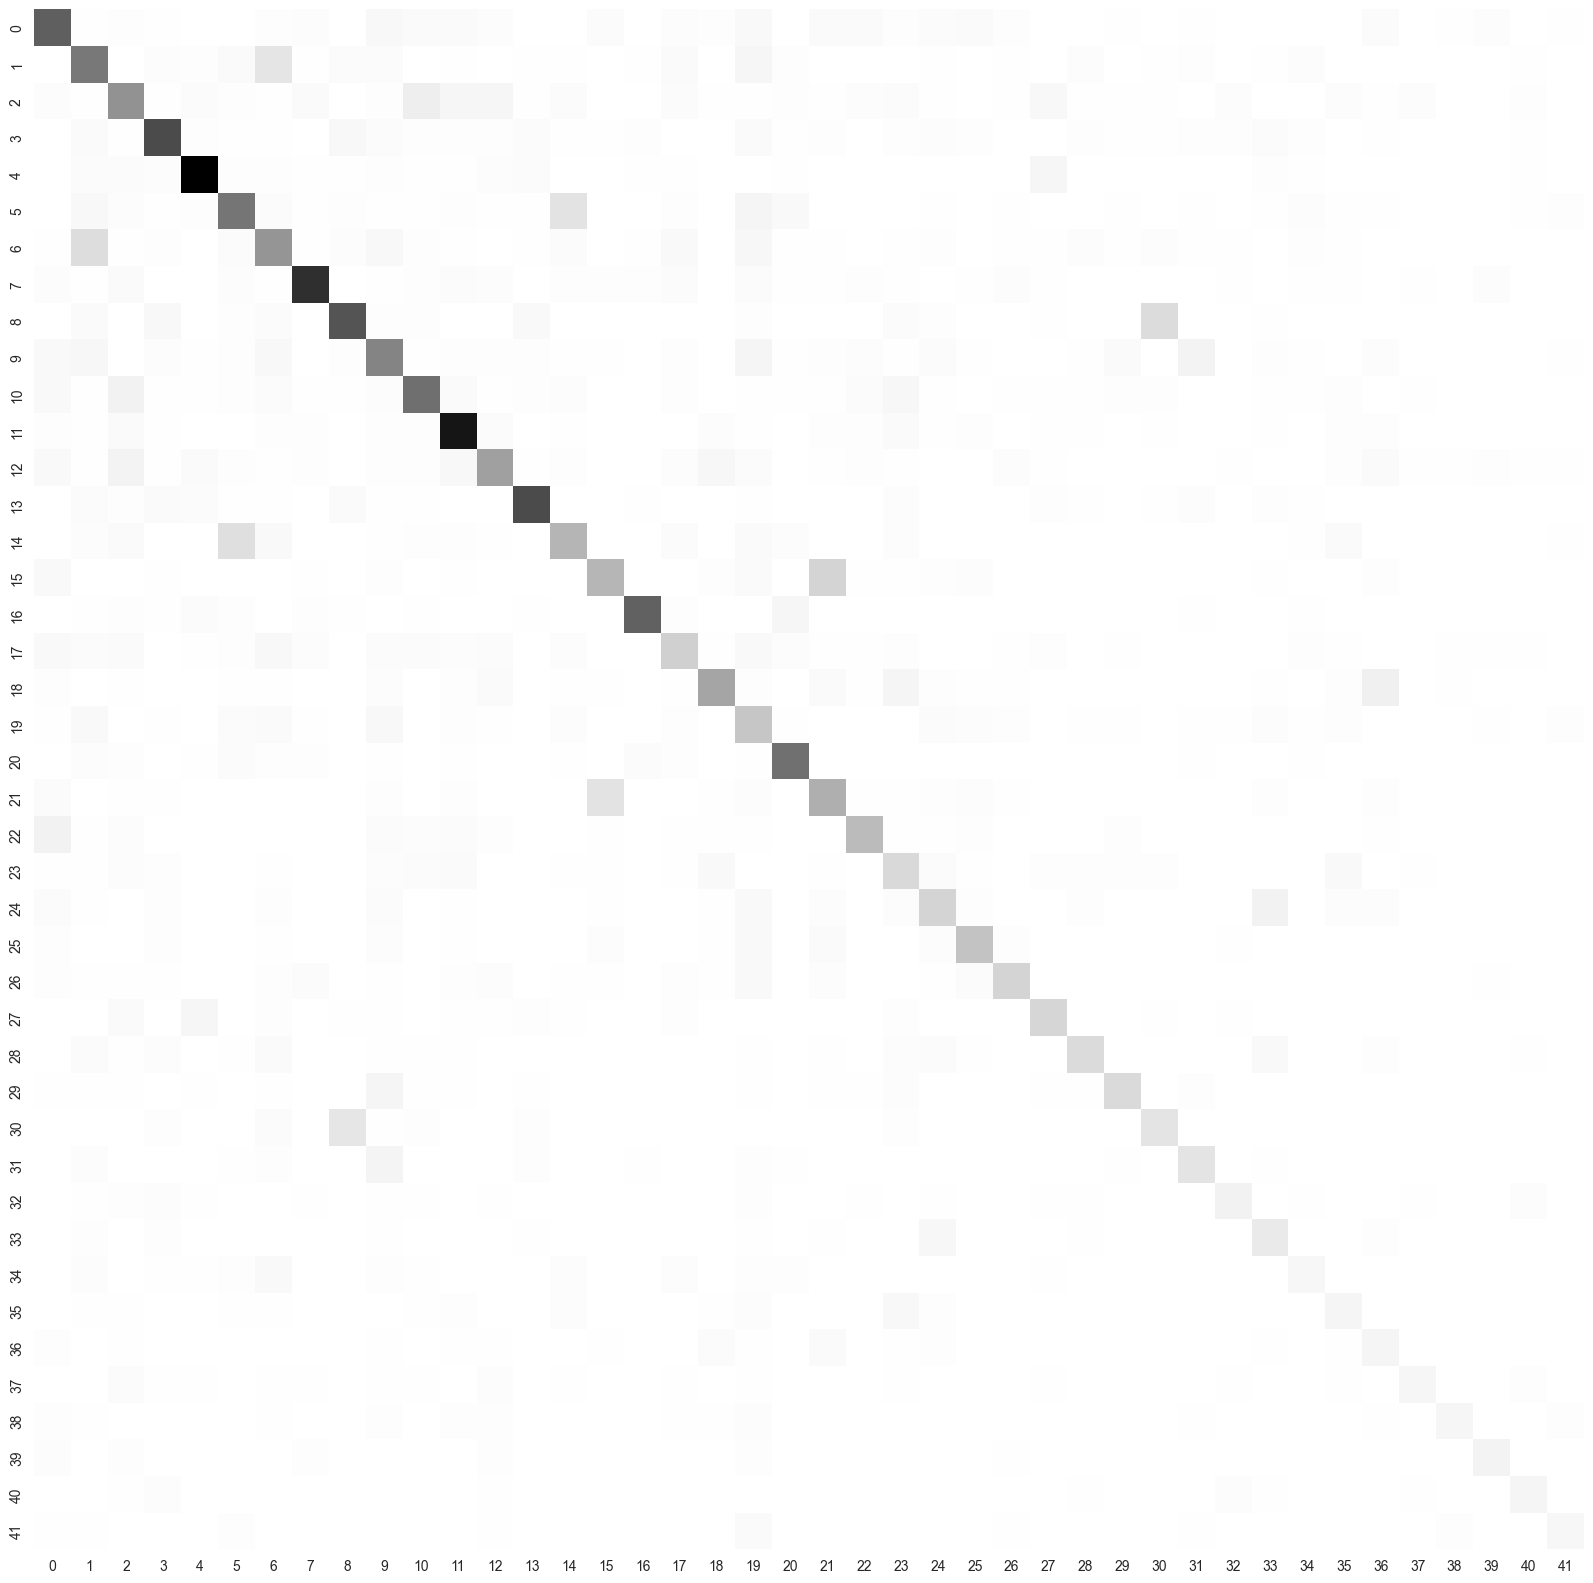

In [45]:
fig = plt.figure(figsize=(20, 20))
sb.heatmap(cm, cbar=False, cmap='Greys', annot=False, fmt='d')